## Project Phase III First ML Proof of Concept
### Name:
- Trung Nguyen
- Andres Matton-Conover
- Fan Du
- Samuel Zheng

In Project Phase III, we built our first Machine Learning (ML) proof of concept to see how predictive modeling can help us understand what affects professor ratings at Northeastern University. Using a simple linear regression model, we looked at how factors like difficulty level, "would take again" percentage, and college affiliation impact a professor's average rating.
Here’s what we did:

- Data Prep: Cleaned the dataset, created dummy variables for college categories, and split the data into training and testing sets.
- Model Building: Used the Normal Equation to calculate the coefficients for our linear regression model.
- Evaluation: Measured how well the model works using metrics like Mean Squared Error (MSE) and R² Score, and visualized the results with residual plots, scatter plots of actual vs. predicted values, and line graphs for trends.
- Prediction Testing: Ran several test cases to see how well the model predicts ratings based on different inputs.



### Import Libraries and Loead the cleaned data set

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
clean_data = pd.read_csv('clean_data.csv')
clean_data_dummies = pd.get_dummies(clean_data, columns=["NEU_Colleges"], drop_first=True)
clean_data_dummies.head()

,First Name,Middle Name,Last Name,ID,Department,Institution Name,Institution ID,Number of Ratings,Average Rating (Out of 5),Would Take Again (Percent),...,Popular Tags,Reviews,"NEU_Colleges_College of Arts, Media, and Design (CAMD)",NEU_Colleges_College of Engineering (COE),NEU_Colleges_College of Professional Studies (CPS),NEU_Colleges_College of Science (COS),NEU_Colleges_College of Social Sciences and Humanities (CSSH),NEU_Colleges_D’Amore-McKim School of Business (DMSB),NEU_Colleges_Khoury College of Computer Sciences,NEU_Colleges_School of Law
0,Anand,NaN,Asthagiri,2894891,Biomedical,Northeastern University,696,1.0,5.0,1.00,...,"['Amazing lectures', 'Inspirational', 'Accessi...",Attendance Clarity (color) Easy (color) ...,False,False,False,True,False,False,False,False
1,Faizul,NaN,Huq,2854044,Business,Northeastern University,696,7.0,2.6,0.43,...,"['Tough grader', 'Participation matters', 'Gro...",Attendance Clarity (color) Easy (color) ...,False,False,False,False,False,True,False,False
2,sakib,NaN,miazi,2989886,Computer Science,Northeastern University,696,1.0,1.0,0.00,...,"['Group projects', 'Lots of homework', 'Lectur...",Attendance Clarity (color) Easy (color) ...,False,False,False,False,False,False,True,False
3,Mohammad,NaN,Abderrazzaq,1268571,Arabic,Northeastern University,696,20.0,4.5,1.00,...,"['Respected', 'Caring', 'Amazing lectures', 'W...",Attendance Clarity (color) Easy (color) Hel...,False,False,False,False,True,False,False,False
4,Mehdi,NaN,Abedi,2162443,Engineering,Northeastern University,696,21.0,3.5,0.62,...,"['Get ready to read', 'Hilarious', 'Lots of ho...",Attendance Clarity (color) Easy (color)...,False,True,False,False,False,False,False,False


## Scatter plots to showcase the relationship between the variables and the target (Average Rating)

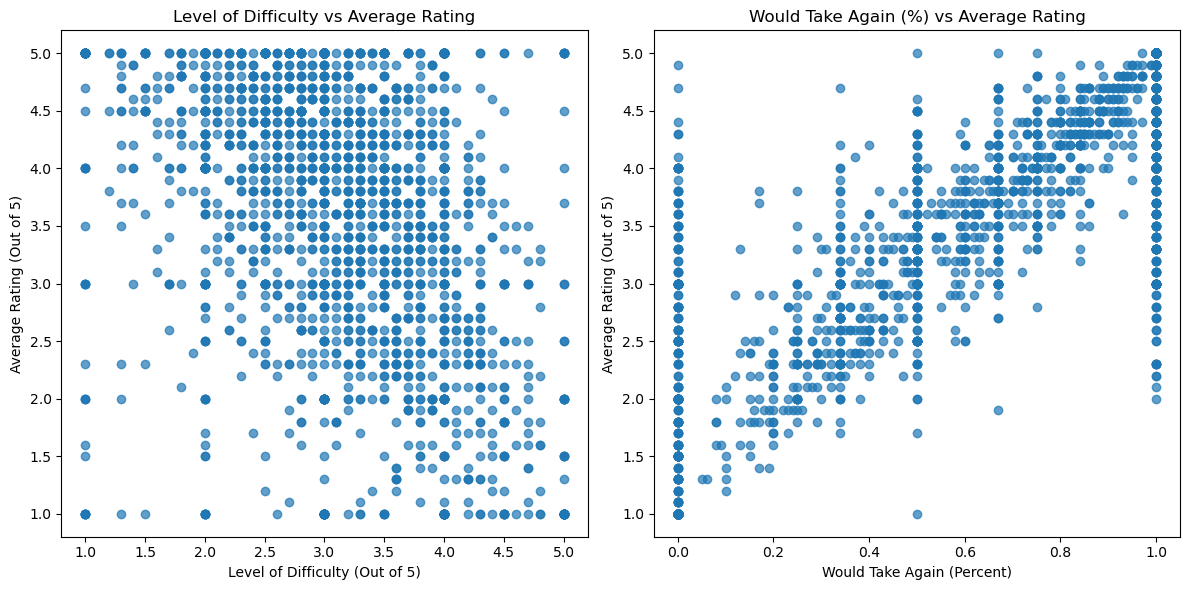

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Level of Difficulty vs Average Rating
axs[0].scatter(clean_data_dummies["Level of Difficulty (Out of 5)"], y, alpha=0.7)
axs[0].set_title("Level of Difficulty vs Average Rating")
axs[0].set_xlabel("Level of Difficulty (Out of 5)")
axs[0].set_ylabel("Average Rating (Out of 5)")

# Scatter plot for Would Take Again vs Average Rating
axs[1].scatter(clean_data_dummies["Would Take Again (Percent)"], y, alpha=0.7)
axs[1].set_title("Would Take Again (%) vs Average Rating")
axs[1].set_xlabel("Would Take Again (Percent)")
axs[1].set_ylabel("Average Rating (Out of 5)")

plt.tight_layout()
plt.show()

## Prep for the Rating Prediction (ML LinearRegressgion)

In [21]:
#set up the variable
X = clean_data_dummies[["Level of Difficulty (Out of 5)", "Would Take Again (Percent)"] + [col for col in clean_data_dummies.columns if "NEU_Colleges_" in col]].values.astype(float)
y = clean_data_dummies["Average Rating (Out of 5)"].values.astype(float)
X,y

(array([[3.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [4.  , 0.43, 0.  , ..., 1.  , 0.  , 0.  ],
        [4.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
        ...,
        [2.5 , 0.5 , 0.  , ..., 0.  , 0.  , 0.  ],
        [3.9 , 0.54, 0.  , ..., 1.  , 0.  , 0.  ],
        [2.6 , 0.46, 0.  , ..., 0.  , 0.  , 0.  ]]),
 array([5. , 2.6, 1. , ..., 4.3, 3.4, 2.7]))

In [22]:
#Training and testing, had to reshape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_real = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_real = np.c_[np.ones(X_test.shape[0]), X_test]
X_train_real, X_test_real

(array([[1.  , 3.  , 0.88, ..., 0.  , 0.  , 0.  ],
        [1.  , 3.5 , 0.84, ..., 0.  , 1.  , 0.  ],
        [1.  , 2.6 , 1.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [1.  , 2.8 , 1.  , ..., 0.  , 0.  , 0.  ],
        [1.  , 3.2 , 0.46, ..., 1.  , 0.  , 0.  ],
        [1.  , 2.  , 1.  , ..., 0.  , 0.  , 0.  ]]),
 array([[1.  , 3.6 , 0.28, ..., 0.  , 0.  , 0.  ],
        [1.  , 2.  , 0.86, ..., 0.  , 0.  , 0.  ],
        [1.  , 3.  , 1.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [1.  , 2.  , 1.  , ..., 0.  , 0.  , 0.  ],
        [1.  , 3.3 , 0.  , ..., 0.  , 0.  , 0.  ],
        [1.  , 3.2 , 0.6 , ..., 0.  , 0.  , 0.  ]]))

In [23]:
#Finding the different coefficients for the categories
coefficients = np.linalg.inv(X_train_real.T @ X_train_real) @ X_train_real.T @ y_train
intercept = coefficients[0]
weights = coefficients[1:]
y_pred = X_test_real @ coefficients
coefficients, intercept, weights, y_pred

(array([ 2.35202419, -0.13254884,  2.57859959,  0.03047547,  0.04145783,
         0.03426962, -0.02915098,  0.0269555 ,  0.05846862, -0.07775148,
        -0.16953484]),
 2.3520241930140315,
 array([-0.13254884,  2.57859959,  0.03047547,  0.04145783,  0.03426962,
        -0.02915098,  0.0269555 ,  0.05846862, -0.07775148, -0.16953484]),
 array([2.59685627, 4.27537119, 4.57443511, 2.94649861, 1.72354964,
        1.88810327, 2.8823955 , 4.55082043, 3.28080092, 4.35436858,
        3.00741658, 3.20424311, 4.36344244, 4.58777463, 3.26089807,
        4.54359095, 4.4552258 , 3.71406131, 4.15467097, 4.76892397,
        4.45389371, 4.49827903, 4.13762193, 4.81677892, 2.56322864,
        4.19656566, 1.90915314, 1.99150112, 4.29237375, 3.78562913,
        4.57670763, 2.74893103, 4.59661048, 3.49006038, 4.55684583,
        4.38717356, 4.32267696, 4.82503045, 4.33879179, 4.66552611,
        4.5914459 , 4.5914459 , 4.45889706, 3.0352182 , 3.95629498,
        4.57443511, 2.49343425, 4.01307042, 4.5329

In [24]:
#calculating the r2 and mse values
square_sum = np.sum((y_test - np.mean(y_test))**2)
square_sum_resid = np.sum((y_test - y_pred)**2)
r2_score = 1 - (square_sum_resid / square_sum)
mse = np.mean((y_test - y_pred)**2)

In [25]:
#printing the result
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2_score:.4f}")
print("Coefficients:")
for i, col in enumerate(["Level of Difficulty (Out of 5)", "Would Take Again (Percent)"] + [col for col in clean_data_dummies.columns if "NEU_Colleges_" in col]):
    print(f"{col}: {weights[i]:.4f}")
print(f"Intercept: {intercept:.4f}")

Mean Squared Error (MSE): 0.3860
R² Score: 0.7278
Coefficients:
Level of Difficulty (Out of 5): -0.1325
Would Take Again (Percent): 2.5786
NEU_Colleges_College of Arts, Media, and Design (CAMD): 0.0305
NEU_Colleges_College of Engineering (COE): 0.0415
NEU_Colleges_College of Professional Studies (CPS): 0.0343
NEU_Colleges_College of Science (COS): -0.0292
NEU_Colleges_College of Social Sciences and Humanities (CSSH): 0.0270
NEU_Colleges_D’Amore-McKim School of Business (DMSB): 0.0585
NEU_Colleges_Khoury College of Computer Sciences: -0.0778
NEU_Colleges_School of Law: -0.1695
Intercept: 2.3520


## Result Explaination:
The values help us understand how different factors influence professor ratings. The intercept shows that if all other variables are zero and the college isn't considered, the professor's score would be about 2.3, which is close to the target value of 2.5. For colleges, the coefficients indicate that, with everything else held constant, being part of a specific college changes the average score by the amount of the coefficient. For difficulty level, the negative coefficient (-0.13) means that for each additional level of difficulty, a professor’s score drops by 0.13 points. The "would take again" percentage coefficient (2.578) suggests that a full unit increase (1.0) in this percentage would raise the professor's score by 2.578. However, it’s more realistic to think of this proportionally—for example, a 1% increase (0.01) would raise the score by about 0.02578 (0.01 × 2.578).

### Implementing Linear Regression for Predictive Data Modeling

In [26]:
def predict_average_rating(difficulty, would_take_again, college, coefficients):
    """
    Predicts the average rating based on difficulty, would-take-again percentage, and college.

    Parameters:
        difficulty (float): The level of difficulty (out of 5).
        would_take_again (float): The percentage of students willing to take the class again (as a fraction, ex., 0.8 for 80%).
        college (string): The name of the college (e.g., 'NEU_Colleges_Khoury College of Computer Sciences').
        coefficients (dict): Dictionary of model coefficients, including intercept and feature weights.

    Returns:
        float: Predicted average rating.
    """
    
    prediction = coefficients["Intercept"]
    prediction += coefficients["Level of Difficulty (Out of 5)"] * difficulty
    prediction += coefficients["Would Take Again (Percent)"] * would_take_again
    college_key = f"NEU_Colleges_{college}"
    if college_key in coefficients:
        prediction += coefficients[college_key]
    else:
        raise ValueError(f"Invalid college name: {college}")
    
    return prediction


In [27]:
coefficients = {
    'Level of Difficulty (Out of 5)': -0.1325,
    'Would Take Again (Percent)': 2.5786,
    'NEU_Colleges_College of Arts, Media, and Design (CAMD)': 0.0305,
    'NEU_Colleges_College of Engineering (COE)': 0.0415,
    'NEU_Colleges_College of Professional Studies (CPS)': 0.0343,
    'NEU_Colleges_College of Science (COS)': -0.0292,
    'NEU_Colleges_College of Social Sciences and Humanities (CSSH)': 0.0270,
    'NEU_Colleges_D’Amore-McKim School of Business (DMSB)': 0.0585,
    'NEU_Colleges_Khoury College of Computer Sciences': -0.0778,
    'NEU_Colleges_School of Law': -0.1695,
    'Intercept': 2.3520
}

predicted_rating = predict_average_rating(
    difficulty=4.0, 
    would_take_again=0.85,
    college="Khoury College of Computer Sciences", 
    coefficients=coefficients
)

print(f"Predicted Average Rating: {predicted_rating:.4f}")


Predicted Average Rating: 3.9360


### Testing the Model

In [41]:
#Example 1: Testing with "D’Amore-McKim School of Business (DMSB)"
predicted_rating_dmsb = predict_average_rating(
    difficulty=2.0, 
    would_take_again=0.7,
    college="D’Amore-McKim School of Business (DMSB)", 
    coefficients=coefficients
)

print(f"Predicted Average Rating (DMSB): {predicted_rating_dmsb:.4f}")


Predicted Average Rating (DMSB): 3.9505


In [42]:
#Example 2: Testing with "College of Science (COS)"
predicted_rating_cos = predict_average_rating(
    difficulty=4.8, 
    would_take_again=0.5,
    college="College of Science (COS)", 
    coefficients=coefficients
)

print(f"Predicted Average Rating (COS): {predicted_rating_cos:.4f}")


Predicted Average Rating (COS): 2.9761


In [43]:
#Example 4: Testing with "School of Law"
predicted_rating_law = predict_average_rating(
    difficulty=3.0, 
    would_take_again=0.6,
    college="School of Law", 
    coefficients=coefficients
)

print(f"Predicted Average Rating (School of Law): {predicted_rating_law:.4f}")

Predicted Average Rating (School of Law): 3.3322


## Residual Plot:
Highlights the residuals (errors) against the predicted ratings, helping to visualize any systematic errors in the predictions.

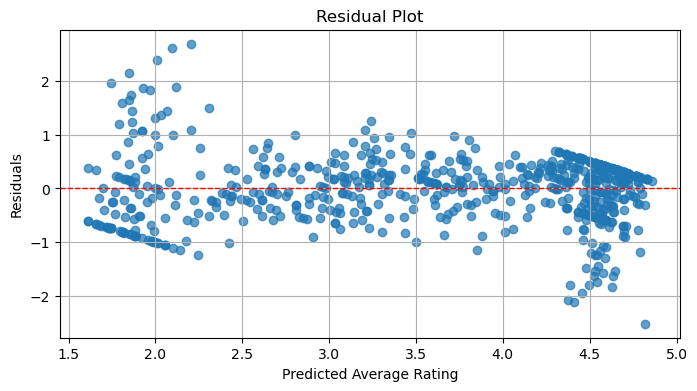

In [46]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot")
plt.xlabel("Predicted Average Rating")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

## Scatter Plot of Actual vs. Predicted
Compares the actual ratings with the predicted values, showing how well the model aligns with the real data.

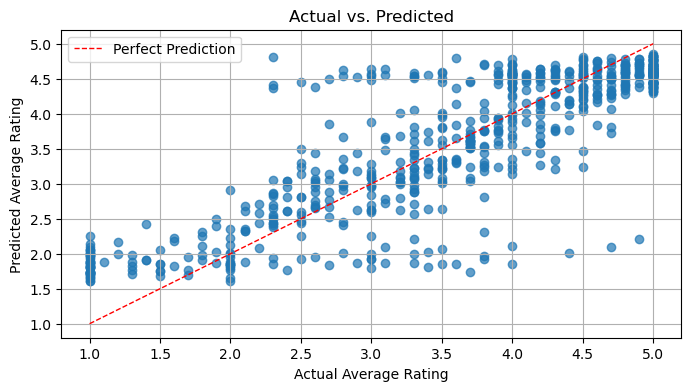

In [47]:
# Scatter Plot of Actual vs. Predicted
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=1, label="Perfect Prediction")
plt.title("Actual vs. Predicted")
plt.xlabel("Actual Average Rating")
plt.ylabel("Predicted Average Rating")
plt.grid(True)
plt.legend()
plt.show()

## System Recommendation Modeling (2nd ML)

### Preprocess the text data

In [51]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords


In [52]:

# Download stopwords from NLTK if not already available
nltk.download('stopwords')

# Specify the file path to the dataset
file_path = 'clean_data.csv'  # Replace with your actual file path
clean_data = pd.read_csv(file_path)

# Check if the column 'NEU_Colleges' exists for One-Hot encoding
if "NEU_Colleges" in clean_data.columns:
    # Generate One-Hot encoded columns for 'NEU_Colleges' and drop the first category to avoid multicollinearity
    clean_data = pd.get_dummies(clean_data, columns=["NEU_Colleges"], prefix="NEU_Colleges", drop_first=True)
    print("Generated One-Hot encoding columns.")
else:
    # Check if the One-Hot encoded columns already exist
    one_hot_columns = [col for col in clean_data.columns if col.startswith("NEU_Colleges_")]
    # Raise an error if neither 'NEU_Colleges' nor its encoded columns are found
    if not one_hot_columns:
        raise ValueError("Neither the 'NEU_Colleges' column nor its One-Hot encoded columns were found!")

# Print the One-Hot encoded columns
print(f"One-Hot columns: {[col for col in clean_data.columns if col.startswith('NEU_Colleges_')]}")

# Identify columns related to 'tags' or 'comments' in the dataset
actual_tags_column = [col for col in clean_data.columns if 'tag' in col.lower()]
actual_comments_column = [col for col in clean_data.columns if 'comment' in col.lower()]

# Combine the identified tag and comment columns
target_columns = actual_tags_column + actual_comments_column
# Raise an error if no relevant columns are found
if not target_columns:
    raise ValueError("No columns related to 'tags' or 'comments' were found in the data!")

# Print the identified columns for preprocessing
print(f"Identified target columns for preprocessing: {target_columns}")

# Define a function to preprocess text data
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    stop_words = set(stopwords.words('english'))  # Load English stopwords
    # Remove stopwords and keep meaningful words
    words = [word for word in text.split() if word not in stop_words]  
    return ' '.join(words)  # Rejoin the processed words into a single string

# Apply text preprocessing to the identified target columns
for col in target_columns:
    # Ensure all values are strings, handle missing values, and apply the preprocessing function
    clean_data[col] = clean_data[col].astype(str).fillna('').apply(preprocess_text)

# Display the first few rows of the cleaned dataset
clean_data.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tnguyen287/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Generated One-Hot encoding columns.
One-Hot columns: ['NEU_Colleges_College of Arts, Media, and Design (CAMD)', 'NEU_Colleges_College of Engineering (COE)', 'NEU_Colleges_College of Professional Studies (CPS)', 'NEU_Colleges_College of Science (COS)', 'NEU_Colleges_College of Social Sciences and Humanities (CSSH)', 'NEU_Colleges_D’Amore-McKim School of Business (DMSB)', 'NEU_Colleges_Khoury College of Computer Sciences', 'NEU_Colleges_School of Law']
Identified target columns for preprocessing: ['Popular Tags']


,First Name,Middle Name,Last Name,ID,Department,Institution Name,Institution ID,Number of Ratings,Average Rating (Out of 5),Would Take Again (Percent),...,Popular Tags,Reviews,"NEU_Colleges_College of Arts, Media, and Design (CAMD)",NEU_Colleges_College of Engineering (COE),NEU_Colleges_College of Professional Studies (CPS),NEU_Colleges_College of Science (COS),NEU_Colleges_College of Social Sciences and Humanities (CSSH),NEU_Colleges_D’Amore-McKim School of Business (DMSB),NEU_Colleges_Khoury College of Computer Sciences,NEU_Colleges_School of Law
0,Anand,NaN,Asthagiri,2894891,Biomedical,Northeastern University,696,1.0,5.0,1.00,...,amazing lectures inspirational accessible outs...,Attendance Clarity (color) Easy (color) ...,False,False,False,True,False,False,False,False
1,Faizul,NaN,Huq,2854044,Business,Northeastern University,696,7.0,2.6,0.43,...,tough grader participation matters group proje...,Attendance Clarity (color) Easy (color) ...,False,False,False,False,False,True,False,False
2,sakib,NaN,miazi,2989886,Computer Science,Northeastern University,696,1.0,1.0,0.00,...,group projects lots homework lecture heavy,Attendance Clarity (color) Easy (color) ...,False,False,False,False,False,False,True,False
3,Mohammad,NaN,Abderrazzaq,1268571,Arabic,Northeastern University,696,20.0,4.5,1.00,...,respected caring amazing lectures would take i...,Attendance Clarity (color) Easy (color) Hel...,False,False,False,False,True,False,False,False
4,Mehdi,NaN,Abedi,2162443,Engineering,Northeastern University,696,21.0,3.5,0.62,...,get ready read hilarious lots homework tough g...,Attendance Clarity (color) Easy (color)...,False,True,False,False,False,False,False,False


### Machine Learning Implement

In [53]:
file_path_tfidf = "clean_data_with_tags_comments_and_one_hot.csv"
tfidf_data = pd.read_csv(file_path_tfidf)

In [54]:
reviews = tfidf_data['Reviews'].fillna('')  

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_professors(professor_name, top_n=5):
    # Normalize the input professor name to title case
    professor_name = professor_name.title()
    
    # Check if professor exists in the dataset
    if professor_name not in tfidf_data['First Name'].values:
        return f"Professor {professor_name} not found in the dataset."
    
    # Get the index of the professor in the dataframe
    prof_index = tfidf_data[tfidf_data['First Name'] == professor_name].index[0]
    
    # Compute similarity scores and sort them
    similarity_scores = list(enumerate(cosine_sim[prof_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the professor themselves and retrieve top n recommendations
    recommendations = similarity_scores[1:top_n + 1]
    
    # Build the output list of recommended professors
    recommended_profs = [(tfidf_data.iloc[i[0]]['First Name'], i[1]) for i in recommendations]
    return recommended_profs

# Example: Get top 10 recommendations for a specific professor
recommendations = recommend_professors("mohammad", top_n=10)
recommendations

[('Max', 0.499373244536229),
 ('Chris', 0.49637869329867274),
 ('Mario', 0.49060635586433504),
 ('Grigorios', 0.48933110233686306),
 ('Ellen', 0.4877197893734659),
 ('Frederick', 0.479730969092798),
 ('Sali', 0.4796892210462402),
 ('Brendan', 0.47427590976484907),
 ('Cecelia', 0.4736804951475035),
 ('Robert', 0.4696452200643957)]

### Explaination
This system analyzes professors' reviews using TF-IDF and cosine similarity to find those with similar review content. Simply call recommend_professors(professor_name, top_n) with a professor's name and the number of recommendations you want. For example, recommend_professors("Mohammad", 5) will suggest five professors with reviews most similar to Mohammad's, helping identify those with comparable feedback or teaching styles.